bind colab with google cloud drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


import necessary functions and packages

In [2]:
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


print file names in gdrive

In [3]:
file_path="/content/gdrive/My Drive/datasets"
file_names=os.listdir(file_path)
print(file_names)


['emnist-byclass-train.csv', 'emnist-byclass-test.csv']


import the train and test dataset

In [4]:
train_pd = pd.read_csv('/content/gdrive/My Drive/datasets/emnist-byclass-train.csv',delimiter=",", nrows=308016,header=None)
test_pd = pd.read_csv('/content/gdrive/My Drive/datasets/emnist-byclass-test.csv',delimiter=",", nrows=70000, header=None)

show the numbers of each label 

Text(0, 0.5, 'Label')

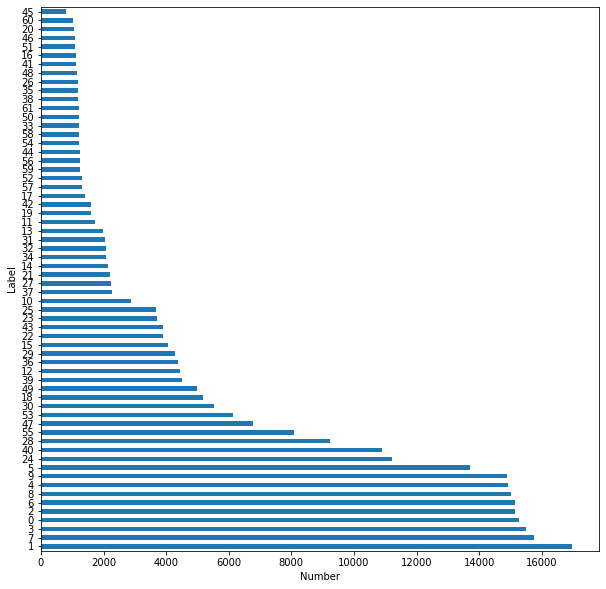

In [5]:
train_pd.iloc[:,0].value_counts().plot(kind='barh',figsize=(10,10))
plt.xlabel('Number')
plt.ylabel('Label')

select features and labels from train and test dataset 

In [6]:
data_train_feature = train_pd.loc[:, "1":"784"].to_numpy()
data_train_label = train_pd.iloc[:, 0].to_numpy()
data_test_feature = test_pd.loc[:, "1":"784"].to_numpy()
data_test_label = test_pd.iloc[:, 0].to_numpy()

show the shape of each dataset

In [7]:
print(data_train_feature.shape,
data_train_label.shape,
data_test_feature.shape,
data_test_label.shape)

(308016, 784) (308016,) (70000, 784) (70000,)


normalisation and standardisation for the feature in train and test dataset

In [8]:
%%time
data_train_standerd_1= StandardScaler().fit_transform(data_train_feature)
train_normal_1 = normalize(data_train_standerd_1)

data_test_standerd_1= StandardScaler().fit_transform(data_test_feature)
test_normal_1 = normalize(data_test_standerd_1)

CPU times: user 6.41 s, sys: 893 ms, total: 7.3 s
Wall time: 7.25 s


principle component analysis

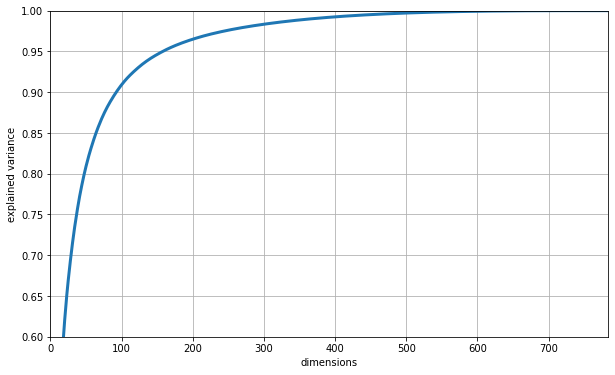

In [9]:
pca = PCA()
pca.fit(train_normal_1)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(cumsum, linewidth = 3)
plt.axis([0, 784, 0.6, 1])
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

choose minimal 90% of the principal components

In [10]:
pca = PCA(n_components=100)
train_normal_11 = pca.fit_transform(train_normal_1)
test_normal_11 = pca.fit_transform(test_normal_1)

hyperparameter turning for SVM

As there are too much data in our dataset, it is hard to turn the hyperparameter for one time. The first block below shows the results of (C=1, gamma=1), (C=1, gamma=3) and (C=3, gamma=1). The second block below shows the results of C=3, gamma=3. We think there is no influence for us to get the best hyperparameter. Based on the scores in the grid search, we can get the conclusion that C=3 and gamma=1 are the best hyperparameter for SVM model.

In [ ]:
%%time

param_grid={'C': [1,3],'gamma' : [1,3]}
grid_search = GridSearchCV(SVC(), param_grid, cv=2, verbose=3)
grid_search.fit(train_normal_11, data_train_label)


print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ......................C=1, gamma=1;, score=0.827 total time=65.1min
[CV 2/2] END ......................C=1, gamma=1;, score=0.828 total time=65.1min
[CV 1/2] END ......................C=1, gamma=3;, score=0.829 total time=98.6min
[CV 2/2] END ......................C=1, gamma=3;, score=0.830 total time=97.9min
[CV 1/2] END ......................C=3, gamma=1;, score=0.836 total time=61.1min
[CV 2/2] END ......................C=3, gamma=1;, score=0.837 total time=62.2min


In [12]:
%%time

param_grid={'C': [3],'gamma' : [3]}
grid_search = GridSearchCV(SVC(), param_grid, cv=2, verbose=3)
grid_search.fit(train_normal_11, data_train_label)


print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END ......................C=3, gamma=3;, score=0.828 total time=89.3min
[CV 2/2] END ......................C=3, gamma=3;, score=0.830 total time=87.6min
Best parameters: {'C': 3, 'gamma': 3}
Best cross-validation score: 0.8293
Best estimator:
SVC(C=3, gamma=3)
CPU times: user 4h 32min 29s, sys: 29 s, total: 4h 32min 58s
Wall time: 4h 31min 49s


Hyperparameter turning for random forest

In [ ]:
%%time

param_grid={'n_estimators': [100, 200, 300]}
grid_search = GridSearchCV(RandomForestClassifier(n_jobs =-1), param_grid, cv=2, verbose=3)
grid_search.fit(train_normal_11, data_train_label)


print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END ..................n_estimators=100;, score=0.749 total time= 1.3min
[CV 2/2] END ..................n_estimators=100;, score=0.750 total time= 1.3min
[CV 1/2] END ..................n_estimators=200;, score=0.755 total time= 2.6min
[CV 2/2] END ..................n_estimators=200;, score=0.755 total time= 2.6min
[CV 1/2] END ..................n_estimators=300;, score=0.757 total time= 3.8min
[CV 2/2] END ..................n_estimators=300;, score=0.758 total time= 3.8min
Best parameters: {'n_estimators': 300}
Best cross-validation score: 0.7573
Best estimator:
RandomForestClassifier(n_estimators=300, n_jobs=-1)
CPU times: user 1h 9min 51s, sys: 47.1 s, total: 1h 10min 38s
Wall time: 23min 41s


the best model of support vector machine

In [11]:
%%time

svc_classifier = SVC(C=3, gamma=1, verbose=3)
svc_classifier.fit(train_normal_11 , data_train_label)
y_pred_svc = svc_classifier.predict(test_normal_11)
print("Accuracy on test set y: {:.5f}".format(accuracy_score(data_test_label, y_pred_svc)))
accuracy_SVM = accuracy_score(data_test_label, y_pred_svc)
print(classification_report(data_test_label, y_pred_svc))

[LibSVM]Accuracy on test set y: 0.37684
              precision    recall  f1-score   support

           0       0.51      0.61      0.56      3461
           1       0.55      0.46      0.50      3860
           2       0.17      0.25      0.20      3559
           3       0.48      0.68      0.56      3577
           4       0.30      0.35      0.32      3411
           5       0.23      0.23      0.23      3115
           6       0.74      0.77      0.75      3426
           7       0.66      0.63      0.64      3768
           8       0.39      0.56      0.46      3375
           9       0.51      0.43      0.47      3390
          10       0.26      0.44      0.33       647
          11       0.19      0.17      0.18       395
          12       0.30      0.28      0.29      1080
          13       0.25      0.20      0.22       446
          14       0.08      0.11      0.09       521
          15       0.10      0.18      0.13       874
          16       0.34      0.44      0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the best model of random forest

In [11]:
%%time

ran_for = RandomForestClassifier(n_estimators=300, n_jobs=-1)
ran_for.fit(train_normal_11 , data_train_label)
y_pred_rf = ran_for.predict(test_normal_11)
print("Random forest ensemble - accuracy on test set:")
print(accuracy_score(data_test_label, y_pred_rf))
accuracy_forest = accuracy_score(data_test_label, y_pred_rf)
print(classification_report(data_test_label, y_pred_rf))

Random forest ensemble - accuracy on test set:
0.4611857142857143
              precision    recall  f1-score   support

           0       0.53      0.75      0.62      3461
           1       0.63      0.83      0.72      3860
           2       0.21      0.42      0.28      3559
           3       0.37      0.66      0.48      3577
           4       0.40      0.71      0.51      3411
           5       0.21      0.26      0.23      3115
           6       0.62      0.92      0.74      3426
           7       0.62      0.83      0.71      3768
           8       0.33      0.48      0.39      3375
           9       0.63      0.55      0.59      3390
          10       0.44      0.34      0.38       647
          11       0.50      0.00      0.01       395
          12       0.43      0.20      0.27      1080
          13       0.73      0.07      0.12       446
          14       0.39      0.02      0.04       521
          15       0.34      0.10      0.15       874
          16   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
